In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.externals import joblib
from tqdm import tqdm

In [34]:
DATADIR = "/home/apofeo/Documents/clp_rotated_v4/train"

In [64]:
DATADIR = "im_base_to_angle/DI_PA_Test/test"

In [2]:
DATADIR = "im_base_to_angle/rotated_5_pa/test"

In [35]:
CATEGORIES_INT = [i for i in range(1, 361)]
CATEGORIES = [str(item) for item in CATEGORIES_INT]
# map(str, CATEGORIES)
# print(CATEGORIES)

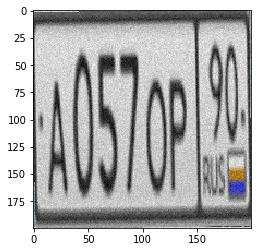

In [36]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [5]:
print(img_array)

[[[214 204 188]
  [206 194 178]
  [216 204 189]
  ...
  [212 202 186]
  [226 216 201]
  [218 210 194]]

 [[204 193 177]
  [216 205 187]
  [217 203 188]
  ...
  [ 62  62  62]
  [ 96  96  96]
  [212 203 189]]

 [[229 219 203]
  [220 210 194]
  [203 193 178]
  ...
  [ 47  47  47]
  [ 62  62  62]
  [225 213 198]]

 ...

 [[209 192 174]
  [ 66  66  66]
  [ 43  43  43]
  ...
  [218 211 199]
  [203 196 184]
  [211 206 193]]

 [[229 214 195]
  [153 153 153]
  [ 79  79  79]
  ...
  [218 212 200]
  [219 213 201]
  [227 222 210]]

 [[201 187 168]
  [220 205 185]
  [215 200 180]
  ...
  [210 204 192]
  [213 207 195]
  [219 213 201]]]


In [38]:
print(img_array.shape)

(200, 200, 3)


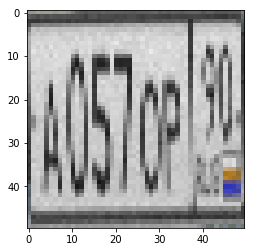

In [37]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

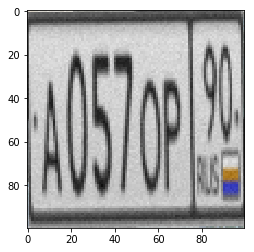

In [39]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [40]:
training_data = []

In [41]:
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                path_to_img = os.path.join(path,img)
                training_data.append([new_array, class_num, path_to_img])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

In [42]:
create_training_data()

100%|██████████| 100/100 [00:08<00:00,  7.92it/s]


In [43]:
print(len(training_data))

36000


In [44]:
import random

In [45]:
random.shuffle(training_data)

In [46]:
for sample in training_data[:10]:
    print(sample[1])

22
182
187
243
142
215
146
92
317
149


In [47]:
X = []
Y = []
# Z = []

In [48]:
for features,label, path in training_data:
    X.append(features)
    Y.append(label)
#     Z.append(path)

In [ ]:
# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

In [49]:
filename = 'trained_data/X_CLP_CI_PA_3CH_V4.sav'
joblib.dump(X, filename)

['trained_data/X_CLP_CI_PA_3CH_V4.sav']

36000


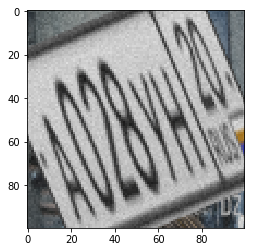

In [50]:
filename = 'trained_data/X_CLP_CI_PA_3CH_V4.sav'
loaded_X = joblib.load(filename)
print(len(loaded_X))
plt.imshow(loaded_X[0])

In [27]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [22]:
print(X[0].shape)

(100, 100, 3)


In [51]:
filename = 'trained_data/Y_CLP_CI_PA_3CH_V4.sav'
joblib.dump(Y, filename)

['trained_data/Y_CLP_CI_PA_3CH_V4.sav']

In [30]:
filename = 'trained_data/Z_CI_pa_3ch_test.sav'
joblib.dump(Z, filename)

['trained_data/Z_CI_pa_3ch_test.sav']